##### prox analises

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('base.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 637 entries, 0 to 636
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tempo       637 non-null    int64  
 1   breque      637 non-null    object 
 2   cria_jur_1  637 non-null    float64
 3   cria_jur_2  637 non-null    float64
 4   jus_estr    36 non-null     object 
 5   exec_jur_1  637 non-null    float64
 6   exec_jur_3  637 non-null    float64
 7   jus_exec    20 non-null     object 
dtypes: float64(4), int64(1), object(3)
memory usage: 39.9+ KB


## Composição da Nota

Três critérios são avaliados para compor a nota: ***Criatividade***, ***Execução*** e ***Equalização***.

Cada um dos jurados irá julgar **dois** dos **três** critérios. Os critérios *execução* e *equalização* variam de 10 a 0, ou seja, todas as baterias comecam com 10 pontos e vão sofrendo descontos (de execução ou equalização) ao longo da apresentação. Já o critério criatividade é avaliado por meio de *estrelas* e de *elementos de efeito geral*, sendo calculado da seguinte forma: 

$criatividade = estrelas \space normalizadas + elemetos \space efeito \space geral + 7 $

Onde:

$ 0 \leqslant estrelas \space normalizadas \leqslant 2$;

$ 0 \leqslant elemetos \space efeito \space geral \leqslant 1$;

Dessa forma, o critério *Criatividade* também varia de 0 a 10.

Sendo assim, nota máxima de cada jurado é de **20 pontos** (2 critérios de 10 pontos) e a nota máxima a ser alcaçada por uma bateria é de **60 pontos** (soma das notas dos 3 jurados).

## Normalização das Estrelas

O critério de criatividade é contabilizado por meio de estrelas. Estas são dadas por dois jurados diferentes baseados em seu critério pessoal, logo, podem ter valores diferentes. Para termos noção de quanto cada estrela agrega na nota final, devemos normalizar elas. A normalização se dá da seguinte forma:

$ valor \space estrela = \frac{2}{maior \space numero \space \ estrelas} $

Onde a variável $maior \space numero \space \ estrelas$ corresponde número de estrelas atribuídas à bateria que mais ganhou estrelas.
\
O maior número de estrelas obtido para o jurado 1 foi 35, logo, o valor unitário de cada estrela é de $\frac{2}{35} = 0.057$
Já para o jurado 2, foi $\frac{2}{45} \approx 0.044$.

In [4]:
# Função para mapear o valor das estrelas

def estrela(x, maxi):
    
    return x * (2/maxi)

In [5]:
df['cria_jur_1'] = df['cria_jur_1'].apply(lambda x: round(estrela(x, maxi = 45), 3))
df['cria_jur_2'] = df['cria_jur_2'].apply(lambda x: round(estrela(x, maxi = 35), 3))

### Coluna "estrelas" e "descontos" 

Umas vez que as estrelas atribuídas por ambos os jurados foram normalizadas, podemos agregar as duas colunas.

As colunas contendo os descontos também serão agregadas.

In [6]:
df['estrelas'] = df['cria_jur_1'] + df['cria_jur_2']
df['descontos'] = df['exec_jur_1'] + df['exec_jur_3']

In [7]:
df

,tempo,breque,cria_jur_1,cria_jur_2,jus_estr,exec_jur_1,exec_jur_3,jus_exec,estrelas,descontos
0,1,entrada,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
1,2,entrada,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
2,3,entrada,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
3,4,entrada,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
4,5,entrada,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
632,633,xilindró,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
633,634,xilindró,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
634,635,xilindró,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0
635,636,xilindró,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0


## EDA

Análise visual dos dados. 

In [8]:
g_estrela = df.groupby('breque')[['estrelas']].sum()

g_desconto = df.groupby('breque')[['descontos']].sum()

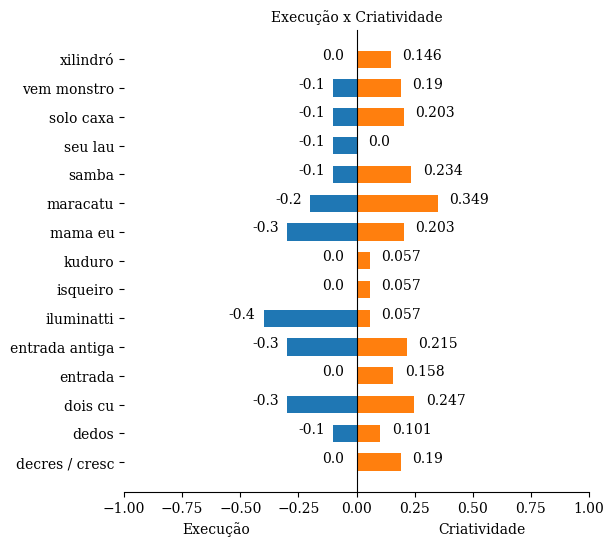

In [16]:
plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(figsize = (6, 6))

ax.spines['right'].set_position('center')
ax.spines[['top', 'left']].set_visible(False)

ax.set_xlim([-1, 1])

ax.set_title(r'Execução x Criatividade', fontsize = 10)

b_descontos = ax.barh(y = g_desconto.index, width = g_desconto['descontos'] * -1, height = .6)
b_estrelas = ax.barh(y = g_estrela.index, width = g_estrela['estrelas'], height = .6)

for barra in b_descontos:
    largura = barra.get_width()
    ax.text(x = largura - 0.15, y = barra.get_y() + barra.get_height() / 2, s = f'{round(barra.get_width(), 1)}')

for barra in b_estrelas:
    largura = barra.get_width()
    ax.text(x = largura + 0.05, y = barra.get_y() + barra.get_height() / 2, s = f'{round(barra.get_width(), 3)}')
    
    
ax.annotate('Execução',
           xy = (-0.75, -.2),
           xytext = (-0.75, -2.5))

ax.annotate('Criatividade',
           xy = (0.35, -.2),
           xytext = (0.35, -2.5))

plt.show()

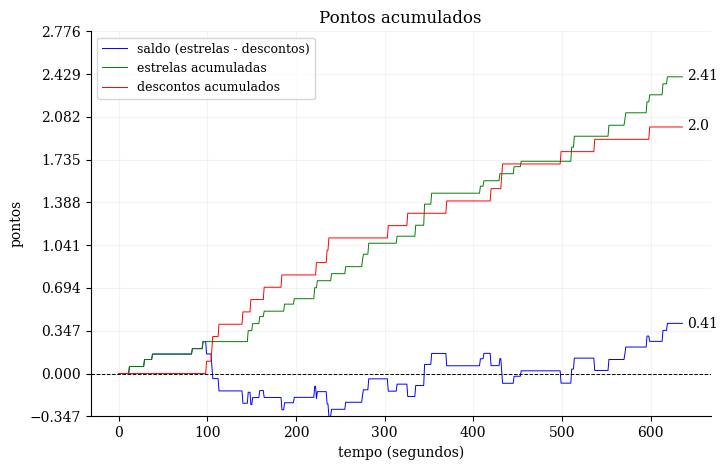

In [70]:
estrelas_acumuladas = np.cumsum(df.estrelas)
descontos_acumulados = np.cumsum(df.descontos)
saldo_pontos = estrelas_acumuladas - descontos_acumulados


plt.rcParams['font.family'] = 'serif'

fig, ax = plt.subplots(figsize = (8,5))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylim(bottom = saldo_pontos.min())

y_ticks = np.arange(saldo_pontos.min(), 3, 0.347)
ax.set_yticks(y_ticks)


ax.set_title('Pontos acumulados')

ax.set_xlabel('tempo (segundos)')
ax.set_ylabel('pontos')



ax.plot(saldo_pontos, label = 'saldo (estrelas - descontos)', c = 'blue', linewidth = .7)
ax.plot(estrelas_acumuladas, label = 'estrelas acumuladas', c = 'green', linewidth = .7)
ax.plot(descontos_acumulados, label = 'descontos acumulados', c = 'red', linewidth = .7)
ax.axhline(0, linestyle = '--', linewidth = .7, color = 'black')


ax.annotate(round(estrelas_acumuladas[636], 2), xy = (.85, .78),
           xytext = (5, 0), xycoords='figure fraction', textcoords='offset points')

ax.annotate(round(descontos_acumulados[636], 2), xy = (.85, .68),
           xytext = (5, 0), xycoords='figure fraction', textcoords='offset points')

ax.annotate(round(saldo_pontos[636], 2), xy = (.85, .285),
           xytext = (5, 0), xycoords='figure fraction', textcoords='offset points')

ax.grid(alpha = .15)

ax.legend(prop = {'size': 9})

plt.show()

In [11]:
# função para retornar as justificativas dos descontos

def justificativa(breque, modalidade):
    
    mapper = {'estrelas': 'jus_estr',
              'descontos' : 'jus_exec'}
    
    sub = df[(df['breque'] == breque) & ((df[mapper[modalidade]]).isna() == False)]
    
    if modalidade == 'descontos':
    
        x = sub[['tempo', 'breque', 'exec_jur_1', 'exec_jur_3', 'jus_exec']]
    
    else:
        
        x = sub[['tempo', 'breque', 'cria_jur_1', 'cria_jur_2', 'jus_estr']]
                                                                                       
    return x

In [12]:
display(justificativa('iluminatti', 'estrelas'))
display(justificativa('iluminatti', 'descontos'))

,tempo,breque,cria_jur_1,cria_jur_2,jus_estr
95,96,iluminatti,0.0,0.057,variacao ritmica


,tempo,breque,exec_jur_1,exec_jur_3,jus_exec
99,100,iluminatti,0.0,0.1,tamborins
105,106,iluminatti,0.0,0.1,tamborins
106,107,iluminatti,0.1,0.0,tamborins
113,114,iluminatti,0.0,0.1,caixas


In [85]:
display(justificativa('mama eu', 'estrelas'))
display(justificativa('mama eu', 'descontos'))

,tempo,breque,cria_jur_1,cria_jur_2,jus_estr
221,222,mama eu,0.089,0.000,bossa
224,225,mama eu,0.000,0.057,variacao ritmica
240,241,mama eu,0.000,0.057,frase chocalhos


,tempo,breque,exec_jur_1,exec_jur_3,jus_exec
223,224,mama eu,0.0,0.1,surdos
235,236,mama eu,0.0,0.1,caixas
237,238,mama eu,0.1,0.0,surdos


In [13]:
display(justificativa('entrada antiga', 'estrelas'))
display(justificativa('entrada antiga', 'descontos'))

,tempo,breque,cria_jur_1,cria_jur_2,jus_estr
408,409,entrada antiga,0.000,0.057,frase chocalhos
412,413,entrada antiga,0.044,0.000,frase agogos
430,431,entrada antiga,0.000,0.057,frase surdos
446,447,entrada antiga,0.000,0.057,frase chocalhos


,tempo,breque,exec_jur_1,exec_jur_3,jus_exec
420,421,entrada antiga,0.0,0.1,surdos
432,433,entrada antiga,0.0,0.1,tamborins
433,434,entrada antiga,0.1,0.0,tamborins


In [14]:
display(justificativa('samba', 'estrelas'))
display(justificativa('samba', 'descontos'))

,tempo,breque,cria_jur_1,cria_jur_2,jus_estr
83,84,samba,0.044,0.000,bossa
454,455,samba,0.044,0.000,frase chocalhos
596,597,samba,0.089,0.000,bossa
599,600,samba,0.000,0.057,variacao ritmica


,tempo,breque,exec_jur_1,exec_jur_3,jus_exec
599,600,samba,0.0,0.1,caixas


In [15]:
display(justificativa('dois cu', 'estrelas'))
display(justificativa('dois cu', 'descontos'))

,tempo,breque,cria_jur_1,cria_jur_2,jus_estr
146,147,dois cu,0.089,0.000,bossa
151,152,dois cu,0.000,0.057,variacao ritmica
159,160,dois cu,0.000,0.057,frase repiques
164,165,dois cu,0.044,0.000,ritmo


,tempo,breque,exec_jur_1,exec_jur_3,jus_exec
140,141,dois cu,0.0,0.1,tamborins
149,150,dois cu,0.0,0.1,tamborins
164,165,dois cu,0.0,0.1,caixas
